In [1079]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import matplotlib.ticker as ticker

%matplotlib inline

plt.figure(figsize=(17, 6))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

<Figure size 1224x432 with 0 Axes>

### Importando os dados

In [750]:
raw_use_of_force = pd.read_csv("./../use-of-force.csv")

#### Dados sem formatação

In [751]:
raw_use_of_force

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
0,18412-2238-14470,18412,Level 1 - Use of Force,2017-11-28T01:40:00,NaN,-,NaN,2238,14470,Black or African American,Female
1,16162-1589-12833,16162,Level 1 - Use of Force,2017-06-22T04:15:00,NaN,-,NaN,1589,12833,Black or African American,Male
2,15041-2017-12130,15041,Level 1 - Use of Force,2017-03-30T15:59:00,NaN,-,NaN,2017,12130,White,Male
3,29139-4759-15571,29139,Level 1 - Use of Force,2018-02-15T13:06:00,NaN,-,NaN,4759,15571,Black or African American,Male
4,30425-4745-16299,30425,Level 1 - Use of Force,2018-07-17T21:00:00,NaN,-,NaN,4745,16299,White,Female
5,30638-2146-17272,30638,Level 1 - Use of Force,2018-07-21T18:58:00,NaN,-,NaN,2146,17272,White,Male
6,18081-1852-14330,18081,Level 1 - Use of Force,2017-11-14T12:56:00,NaN,-,NaN,1852,14330,NaN,Female
7,15097-704-12153,15097,Level 1 - Use of Force,2017-04-03T10:30:00,NaN,-,NaN,704,12153,Black or African American,Female
8,14270-1578-11649,14270,Level 1 - Use of Force,2017-01-26T16:30:00,NaN,-,NaN,1578,11649,White,Male
9,15097-704-11880,15097,Level 1 - Use of Force,2017-04-03T10:30:00,NaN,-,NaN,704,11880,Black or African American,Male


### Data Cleaning

In [752]:
# 1 - Substituir o sinal "-" pelo "nan" que tem um melhor desempenho para computar valores faltosos

raw_use_of_force.loc[raw_use_of_force.Sector == '-', 'Sector'] = np.nan

In [753]:
# 2 - Converter do campo de data do tipo string para o tipo datetime

raw_use_of_force['Occured_date_time'] = pd.to_datetime(raw_use_of_force['Occured_date_time'])

In [754]:
# 3 - Analisando os dados percebemos que delegacia S tem dados do setor U, mas o setor U pertence apenas a delegacia N,
# vamos então alterar o valor da delegacia de S para N para este setor.

raw_use_of_force.loc[(raw_use_of_force['Sector'] == 'U') & (raw_use_of_force['Precinct'] == 'S'),
                                        'Precinct'] = 'N'

In [755]:
# 4 - Também é possível perceber que existe uma delagacia sobresalente (X), esta delagacia não é mencionada pelo departamento 
# de Seattle, então vamos excluí-la.

raw_use_of_force = raw_use_of_force[raw_use_of_force['Precinct'] != 'X']

## Análise Exploratória de Dados

###### 1. Como é a distribuição do uso de força dentre as delegacias e os setores? Em cada setor, qual o *beat* com maior número de incidentes? Apresente também o ranking dos setores segundo o percentual de incidentes "Level 2" em relação ao total de incidentes do respectivo setor.

### Uso da força por delegacia

In [811]:
precinct_groupby = raw_use_of_force.groupby('Precinct').count() 

In [812]:
raw_use_of_force.groupby('Precinct').count() 

,ID,Incident_Num,Incident_Type,Occured_date_time,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
Precinct,,,,,,,,,,
E,1434,1434,1434,1434,1434,1434,1434,1434,1150,1376
N,1836,1836,1836,1836,1836,1836,1836,1836,1627,1812
S,1346,1346,1346,1346,1346,1346,1346,1346,1110,1343
SW,480,480,480,480,480,480,480,480,419,475
W,2015,2015,2015,2015,2015,2015,2015,2015,1679,1923


In [813]:
# Foi selecionado apenas o campo Incident_Num, que expressa mais fielmente a quantidade agrupada pelo seu valor único
# Também foi renomeado o campo Incidente_Num para Quantity e foram ordenados os dados.

precinct_groupby = precinct_groupby[['Incident_Num']]
precinct_groupby.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)
precinct_groupby.sort_values(by='Quantity', ascending=False ,inplace=True)
precinct_groupby

,Quantity
Precinct,
W,2015
N,1836
E,1434
S,1346
SW,480


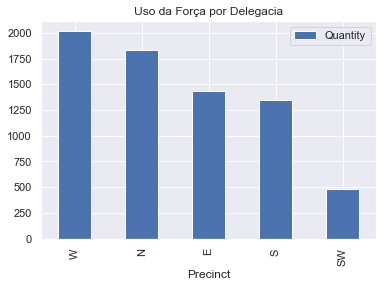

In [814]:
precinct_groupby.plot(kind='bar', title='Uso da Força por Delegacia')

###  Uso da força por setor

In [761]:
sector_groupby = raw_use_of_force.groupby(['Precinct', 'Sector']).count()

In [762]:
# Foi selecionado apenas o campo Incident_Num, que expressa mais fielmente a quantidade agrupada pelo seu valor único
# Também foi renomeado o campo Incidente_Num para Quantity e foram ordenados os dados.

sector_groupby = sector_groupby[['Incident_Num']]
sector_groupby.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)
sector_groupby.sort_values(by='Quantity', ascending=False, inplace=True)

In [763]:
sector_groupby

,,Quantity
Precinct,Sector,
E,E,818
W,K,782
S,S,576
N,N,537
W,D,530
S,R,514
W,M,496
E,G,420
N,U,373


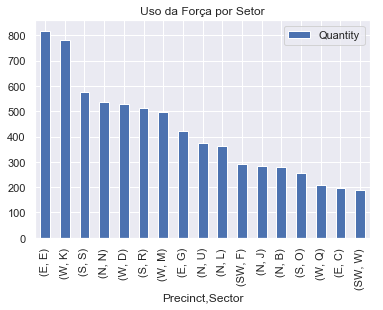

In [764]:
sector_groupby.plot(kind='bar', title='Uso da Força por Setor')

### Uso da força por beat

In [765]:
beat_groupby = raw_use_of_force.groupby(['Precinct', 'Sector', 'Beat']).count()

In [766]:
# Foi selecionado apenas o campo Incident_Num, que expressa mais fielmente a quantidade agrupada pelo seu valor único
# Também foi renomeado o campo Incidente_Num para Quantity

beat_groupby = beat_groupby[['Incident_Num']]
beat_groupby.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)
beat_groupby.reset_index(inplace=True)

# Selecionado apenas o beat com maior número de incidentes, atualizando os índices do dataframe e foram ordernados os dados

beat_groupby_max = beat_groupby.groupby('Sector').max()
beat_groupby_max.reset_index(inplace=True)
beat_groupby_max = beat_groupby_max.set_index(['Precinct', 'Sector', 'Beat'])
beat_groupby_max.sort_values(by='Quantity', ascending=False, inplace=True)
beat_groupby_max

Quantity
Precinct Sector Beat          
E        E      E3         469
W        K      K3         297
N        N      N3         266
S        S      S3         238
         R      R3         234
W        D      D3         234
         M      M3         180
E        G      G3         161
N        U      U3         150
         L      L3         148
S        O      O3         125
SW       F      F3         118
N        J      J3         117
         B      B3         115
W        Q      Q3          82
SW       W      W3          79
E        C      C3          74

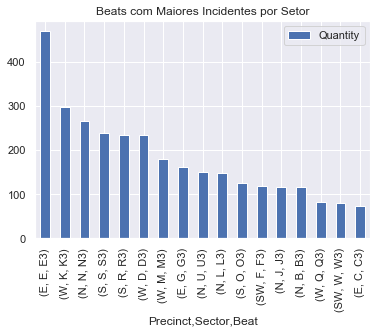

In [767]:
# Beats com maiores incidentes por Setor
beat_groupby_max.plot(kind='bar', title='Beats com Maiores Incidentes por Setor')

### Rank por Setor

In [827]:
sector_incident_type = raw_use_of_force.groupby(['Precinct', 'Sector', 'Incident_Type'])['Incident_Num'].count()

In [828]:
sector_incidente_percent = sector_incident_type.groupby(level=1).apply(lambda x: x * 100/ x.sum()).reset_index()

In [829]:
# Selecionando apenas incidentes do level 2, renomeando o campo e odernando o dataframe

is_level_2 = sector_incidente_percent['Incident_Type'] == 'Level 2 - Use of Force'
sector_incidente_percent = sector_incidente_percent[is_level_2]
sector_incidente_percent.rename(columns={'Incident_Num': 'Percent'}, inplace=True)
sector_incidente_percent.sort_values(by='Percent', ascending=True, inplace=True)
sector_incidente_percent.set_index(['Precinct', 'Sector'], inplace=True)
sector_incidente_percent

Incident_Type    Percent
Precinct Sector                                   
N        J       Level 2 - Use of Force  13.829787
         N       Level 2 - Use of Force  14.338920
SW       W       Level 2 - Use of Force  14.438503
S        S       Level 2 - Use of Force  17.361111
W        Q       Level 2 - Use of Force  18.357488
S        O       Level 2 - Use of Force  18.750000
N        L       Level 2 - Use of Force  19.780220
E        C       Level 2 - Use of Force  19.897959
S        R       Level 2 - Use of Force  21.206226
SW       F       Level 2 - Use of Force  21.501706
N        U       Level 2 - Use of Force  22.252011
W        K       Level 2 - Use of Force  28.260870
E        G       Level 2 - Use of Force  30.714286
         E       Level 2 - Use of Force  31.051345
W        D       Level 2 - Use of Force  33.207547
N        B       Level 2 - Use of Force  33.214286
W        M       Level 2 - Use of Force  39.516129

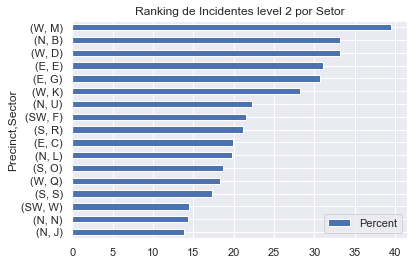

In [830]:
sector_incidente_percent.plot(kind='barh', title='Ranking de Incidentes level 2 por Setor')
plt.ylabel='Percent'

##### 2. Com relação à distribuição dos incidentes no tempo, é possível encontrar picos ou linhas de tendência dentro dos dias, dos meses, das semanas ou dos anos?

### Incidentes por dia

In [1424]:
incident_date_day = raw_use_of_force.copy()

In [1425]:
# Foi obtido apenas a data sem o horário e agrupado por esse campo

incident_date_day['date'] = pd.to_datetime(incident_date_day['Occured_date_time']).dt.to_period('D')
incident_date_day = incident_date_day.groupby(['date']).count()

# Foi selecionado apenas o campo Incident_Num, que expressa mais fielmente a quantidade agrupada pelo seu valor único
# Também foi renomeado o compo Incident_Num para Quantity e os dados foram ordenados

incident_date_day = incident_date_day[['Incident_Num']]
incident_date_day.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

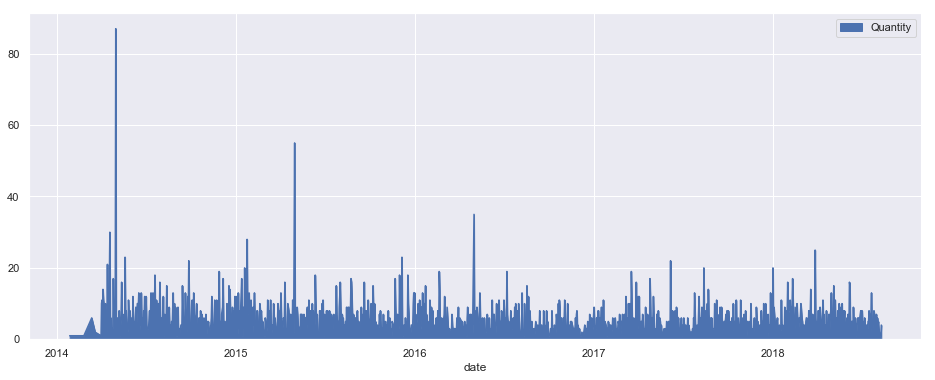

In [1449]:
fig, ax = plt.subplots(figsize=(16, 6))
incident_date_day.plot(ax=ax, kind='area')
# plt.yscale('linear')

### Incidentes por ano-mês

In [1221]:
incident_date_year_month = raw_use_of_force.copy()

In [1222]:
incident_date_year_month['year_month'] = incident_date_year_month['Occured_date_time'].dt.to_period('M')

In [1223]:
incident_date_year_month = incident_date_year_month.groupby(['year_month']).count()

In [1224]:
# Selecionando apenas um campo onde existe a contagem e renomeando.

incident_date_year_month = incident_date_year_month[['Incident_Num']]
incident_date_year_month.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

[Text(0.5,0,'by Month')]

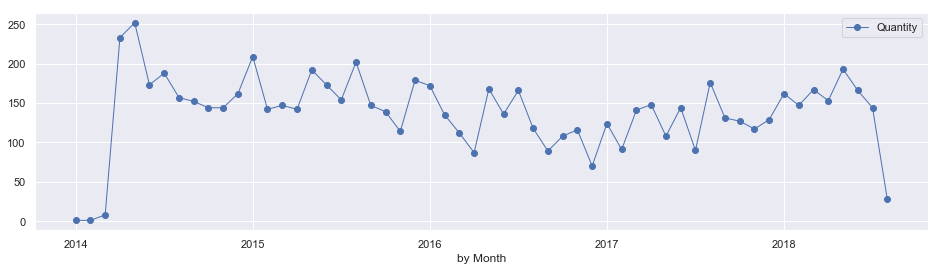

In [1256]:
fig, ax = plt.subplots(figsize=(16, 4))
incident_date_year_month.plot(ls="-", lw="1", marker="o", ax=ax)
ax.set(xlabel="by Month")

### Incidentes por semana

In [784]:
incident_date_week = raw_use_of_force.copy()

In [785]:
incident_date_week['week'] = pd.to_datetime(incident_date_week['Occured_date_time']).dt.to_period('W')

In [786]:
incident_date_week = incident_date_week.groupby(['week']).count()

In [787]:
# Selecionando apenas um campo onde existe a contagem e renomeando.

incident_date_week = incident_date_week[['Incident_Num']]
incident_date_week.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

[Text(0.5,0,'by Week')]

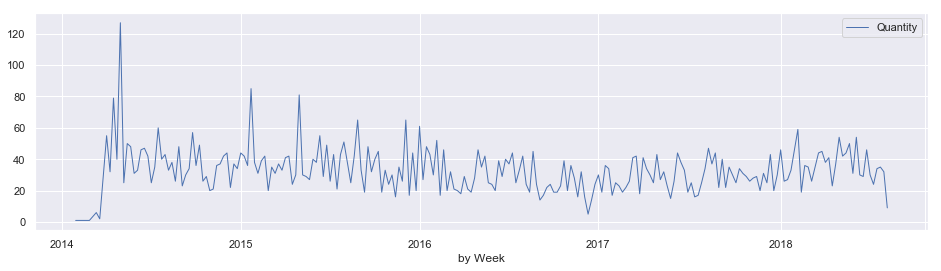

In [1255]:
fig, ax = plt.subplots(figsize=(16, 4))
incident_date_week.plot(ls="-", lw="1", ax=ax)
ax.set(xlabel="by Week")

### Incidentes por ano

In [789]:
incident_date_year = raw_use_of_force.copy()

In [790]:
incident_date_year['year'] = pd.to_datetime(incident_date_year['Occured_date_time']).dt.to_period('Y')

In [791]:
incident_date_year = incident_date_year.groupby(['year']).count()

In [792]:
# Selecionando apenas um campo onde existe a contagem e renomeando.

incident_date_year = incident_date_year[['Incident_Num']]
incident_date_year.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

[Text(0.5,0,'Year')]

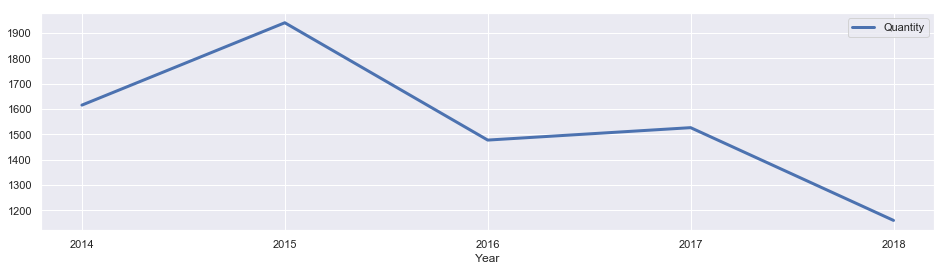

In [1263]:
fig, ax = plt.subplots(figsize=(16, 4))
incident_date_year.plot(lw='3', ax=ax)
ax.set(xlabel="Year")

##### 3. A polícia deseja dar início a uma investigação interna para verificar se existem policiais excessivamente violentos. No entanto, o prazo para o término desta investigação é bastante limitado. Elabore um script capaz de elencar os policiais em ordem decrescente de chance de violência excessiva com base no número de incidentes dos quais eles participaram.



In [1450]:
incident_office = raw_use_of_force.groupby(['Officer_ID'])['Incident_Num'].count()

In [1451]:
# Resetado índiece, calculado a percentagem e ordenado os valores

incident_office = incident_office.reset_index()
incident_office['percentage'] = incident_office['Incident_Num'] * 100/incident_office['Incident_Num'].sum()
incident_office.sort_values(by='percentage', ascending=False, inplace=True)

In [1452]:
# Recuperando o top 10 de policiais com mais incidentes para gerar um gráfico. 

incident_office_top_10 = incident_office.head(10).copy()
incident_office_top_10.sort_values(by='percentage', ascending=True, inplace=True)

[Text(0.5,0,'Percentage %')]

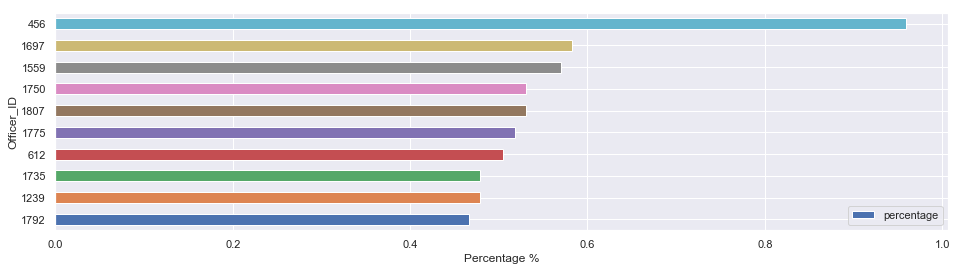

In [1453]:
fig, ax = plt.subplots(figsize=(16, 4))
incident_office_top_10.plot(x='Officer_ID', y='percentage', kind='barh', ax=ax)
ax.set(xlabel="Percentage %")

###### 4. Uma métrica interessante para a polícia é o grau de reincidência por parte dos civis. Apresente o percentual de casos reincidentes em relação ao total de incidentes em cada setor e verifique se há correlação entre esta métrica e o percentual de incidentes "Level 2" calculado na questão 1. Que interpretação pode ser dada a este resultado?

In [1397]:
incident_sector_subject = raw_use_of_force.groupby(['Precinct', 'Sector', 'Subject_ID']).count()

In [1398]:
# Foi selecionado apenas o campo Incident_Num, que expressa mais fielmente a quantidade agrupada pelo seu valor único
# Quando o incidente for reincidente, ou seja aconteu mais que uma vez, o campo 'Repeated' é verdadeiros, se não, falso.

incident_sector_subject = incident_sector_subject[['Incident_Num']]
incident_sector_subject.loc[incident_sector_subject['Incident_Num'] >= 2, 'Repeated'] = True
incident_sector_subject.loc[incident_sector_subject['Incident_Num'] == 1, 'Repeated'] = False

In [1399]:
incident_sector_subject_count = incident_sector_subject.groupby(['Precinct', 'Sector', 'Repeated']).count()

In [1400]:
# Calculando a porcentagem, redefinido os índices do dataframe, renomeado o campo 'Incident_Num' e ordenado os valores

incident_sector_subject_count = incident_sector_subject_count.groupby(level=1).apply(lambda x: x * 100/ x.sum())
incident_sector_subject_count.reset_index(inplace=True)
# incident_sector_subject_count.set_index(['Precinct', 'Sector'], inplace=True)
incident_sector_subject_count.rename(columns={'Incident_Num': 'Percent'}, inplace=True)
incident_sector_subject_count.sort_values(by='Percent', ascending=False, inplace=True)

In [1410]:
sector_incidente_percent.reset_index(inplace=True)

C:\Users\Clairton\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


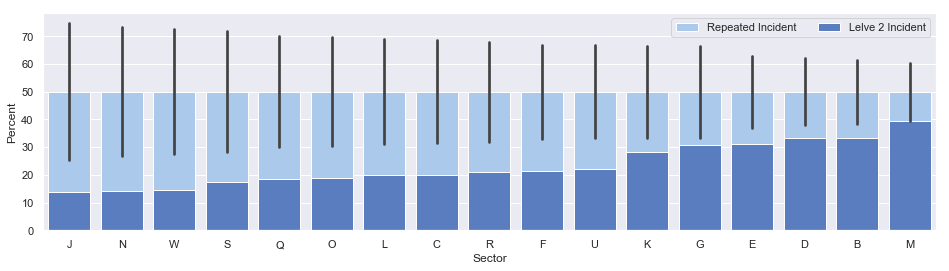

In [1423]:
fig, ax = plt.subplots(figsize=(16, 4))
# incident_sector_subject_count.plot(y='Percent', ax=ax, kind='bar', stacked=True)
# sector_incidente_percent.plot(y='Percent', ax=ax, kind='bar')
sns.set_color_codes("pastel")
sns.barplot(x=incident_sector_subject_count['Sector'], y=incident_sector_subject_count['Percent'],
            color='b', label='Repeated Incident')

sns.set_color_codes("muted")
sns.barplot(x=sector_incidente_percent['Sector'], y=sector_incidente_percent['Percent'], color='b',
           label='Lelve 2 Incident')
ax.legend(ncol=2, loc="upper right", frameon=True)
